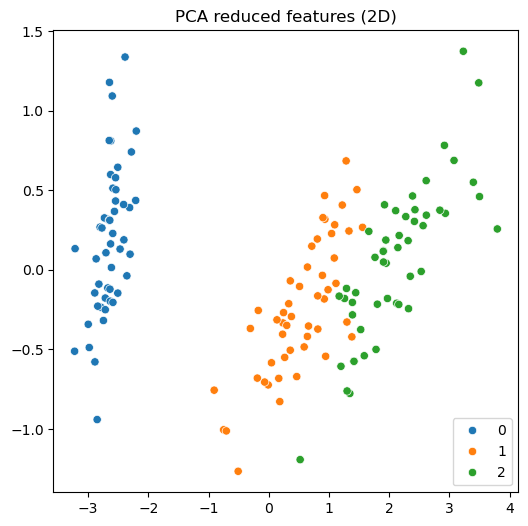

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Quantum VQC training time: 17 seconds
Quantum VQC on the training dataset: 0.51
Quantum VQC on the test dataset: 0.40
Quantum VQC training time: 17 seconds


In [5]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes, EfficientSU2
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit_machine_learning.optimizers import COBYLA
from qiskit.primitives import StatevectorSampler as Sampler
import time
import seaborn as sns

# Load dataset and split it (assuming 'features' and 'labels' are defined)
from sklearn.datasets import load_iris
iris = load_iris()
features, labels = iris.data, iris.target

# Apply PCA (for dimensionality reduction)
pca = PCA(n_components=2)
features_reduced = pca.fit_transform(features)

# Visualize PCA result using seaborn
plt.rcParams["figure.figsize"] = (6, 6)
sns.scatterplot(x=features_reduced[:, 0], y=features_reduced[:, 1], hue=labels, palette="tab10")
plt.title("PCA reduced features (2D)")
plt.show()

# Split the data into training and test sets
train_features, test_features, train_labels, test_labels = train_test_split(
    features_reduced, labels, train_size=0.8, random_state=42
)

# Use quantum circuits to perform PCA-like behavior
feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
ansatz = RealAmplitudes(num_qubits=num_features, reps=3)

# Setup for quantum model (VQC)
num_features = features_reduced.shape[1]  # Number of reduced features
optimizer = COBYLA(maxiter=40)

# Feature map and ansatz
feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
ansatz = EfficientSU2(num_qubits=num_features, reps=3)

# Quantum classifier
sampler = Sampler()
vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
)

# Train the quantum model (VQC)
start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start
print(f"Quantum VQC training time: {round(elapsed)} seconds")

# Evaluate the quantum model
train_score_q2_eff = vqc.score(train_features, train_labels)
test_score_q2_eff = vqc.score(test_features, test_labels)

# Print results
print(f"Quantum VQC on the training dataset: {train_score_q2_eff:.2f}")
print(f"Quantum VQC on the test dataset: {test_score_q2_eff:.2f}")

# Initialize the objective function values list
objective_func_vals = []

# Callback function to track the objective function value during training
def callback_graph(weights, obj_func_eval):
    # Add the current objective function value to the list
    objective_func_vals.append(obj_func_eval)
    
    # Plot the objective function values over iterations
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

# Continue with the VQC setup and training
start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start
print(f"Quantum VQC training time: {round(elapsed)} seconds")

# Optionally, add a callback function to monitor the training progress
def callback_graph(weights, obj_func_eval):
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(obj_func_vals)), objective_func_vals)
    plt.show()

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes, EfficientSU2
from qiskit_machine_learning.algorithms import VQC
from qiskit_machine_learning.optimizers import COBYLA
from qiskit.primitives import StatevectorSampler as Sampler
from qiskit.aqua.algorithms import QSVD  # For Quantum PCA
import numpy as np

# Load dataset
iris = load_iris()
features, labels = iris.data, iris.target

# Apply classical PCA for comparison (optional)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
features_reduced_classical = pca.fit_transform(features)

# Visualize the classical PCA result using seaborn
plt.rcParams["figure.figsize"] = (6, 6)
sns.scatterplot(x=features_reduced_classical[:, 0], y=features_reduced_classical[:, 1], hue=labels, palette="tab10")
plt.title("Classical PCA reduced features (2D)")
plt.show()

# Split the data into training and test sets
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8, random_state=42
)

# Set up for Quantum PCA (QPCA)
num_features = features.shape[1]  # Number of features in the dataset
optimizer = COBYLA(maxiter=40)

# Feature Map and Ansatz for QPCA
feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
ansatz = EfficientSU2(num_qubits=num_features, reps=3)

# QPCA model (QSVD-based approach)
sampler = Sampler()
vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
)

# Train the quantum model (VQC as a placeholder for QPCA)
start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start
print(f"Quantum VQC training time: {round(elapsed)} seconds")

# Evaluate the quantum model
train_score_q2_eff = vqc.score(train_features, train_labels)
test_score_q2_eff = vqc.score(test_features, test_labels)

# Print results
print(f"Quantum VQC on the training dataset: {train_score_q2_eff:.2f}")
print(f"Quantum VQC on the test dataset: {test_score_q2_eff:.2f}")

# Initialize the objective function values list
objective_func_vals = []

# Callback function to track the objective function value during training
def callback_graph(weights, obj_func_eval):
    # Add the current objective function value to the list
    objective_func_vals.append(obj_func_eval)
    
    # Plot the objective function values over iterations
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

ModuleNotFoundError: No module named 'qiskit.aqua'